<P> <B> <font color=red size="4"> 7.OPTICS Clustering</Font></B> </P>

<b><font color=green size="4">OPTICS Clustering on the Iris Dataset:</font></b>

OPTICS (Ordering Points To Identify the Clustering Structure) is a density-based clustering algorithm similar to DBSCAN but more flexible. Unlike DBSCAN, OPTICS does not require a single global density threshold (eps). Instead, it computes a reachability distance for each point, allowing the discovery of clusters with varying densities.

In [1]:
from sklearn.cluster import OPTICS
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.metrics import (
    silhouette_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
    homogeneity_score,
    completeness_score,
    v_measure_score,
    calinski_harabasz_score,
    davies_bouldin_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target  # Ground truth labels

<b><font color=green size="4">Key Parameters of OPTICS</font></b>
    
<b>min_samples:</b>
        Minimum number of samples required to form a dense region.
        
 <b>xi:</b>
        Determines the minimum steepness on the reachability plot to identify clusters.
        
<b>min_cluster_size:</b>
        Minimum size of clusters as a proportion of the dataset.

In [3]:
# Apply OPTICS clustering
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)  # Adjust parameters as needed
y_optics = optics.fit_predict(X)

In [4]:
silhouette_avg = silhouette_score(X, y_optics)
calinski_harabasz = calinski_harabasz_score(X, y_optics)
davies_bouldin = davies_bouldin_score(X, y_optics)
adjusted_rand = adjusted_rand_score(y, y_optics)
normalized_mutual_info = normalized_mutual_info_score(y, y_optics)
homogeneity = homogeneity_score(y, y_optics)
completeness = completeness_score(y, y_optics)
v_measure = v_measure_score(y, y_optics)

In [5]:
# Display the results
results = pd.DataFrame({
    "Metric": [
        "Silhouette Coefficient",
        "Davies-Bouldin Index",
        "Calinski-Harabasz Index",
        "Adjusted Rand Index",
        "Normalized Mutual Information",
        "Homogeneity",
        "Completeness",
        "V-Measure"
    ],
    "Score": [
        silhouette_avg,
        davies_bouldin,
        calinski_harabasz,
        adjusted_rand,
        normalized_mutual_info,
        homogeneity,
        completeness,
        v_measure
    ]
})

print(results)

                          Metric       Score
0         Silhouette Coefficient    0.360976
1           Davies-Bouldin Index    0.761693
2        Calinski-Harabasz Index  308.594119
3            Adjusted Rand Index    0.574940
4  Normalized Mutual Information    0.708699
5                    Homogeneity    0.650547
6                   Completeness    0.778268
7                      V-Measure    0.708699


In [6]:
# Reduce dimensions for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)


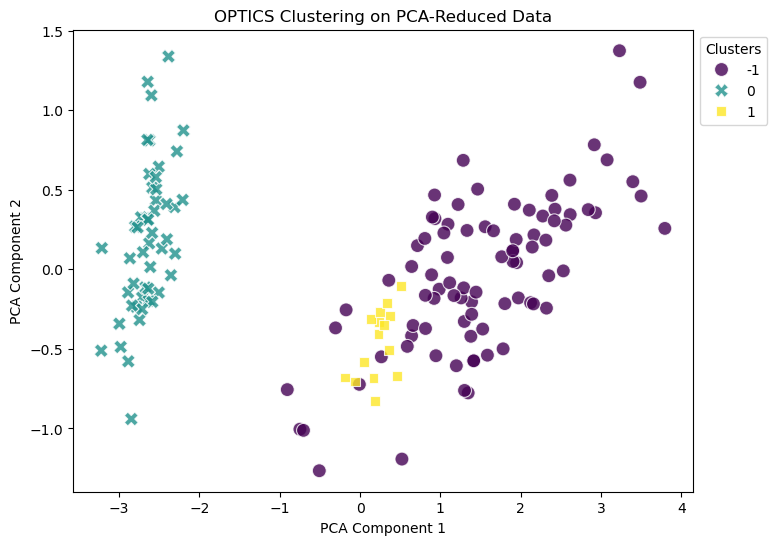

In [7]:
# Visualization of Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=y_optics, palette='viridis', style=y_optics, s=100, alpha=0.8
)
plt.title('OPTICS Clustering on PCA-Reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Clusters', loc='best', bbox_to_anchor=(1, 1))
plt.show()

<b>Visualizing Reachability Plot:</b>

The reachability plot is an essential part of OPTICS, helping to understand the clustering structure.

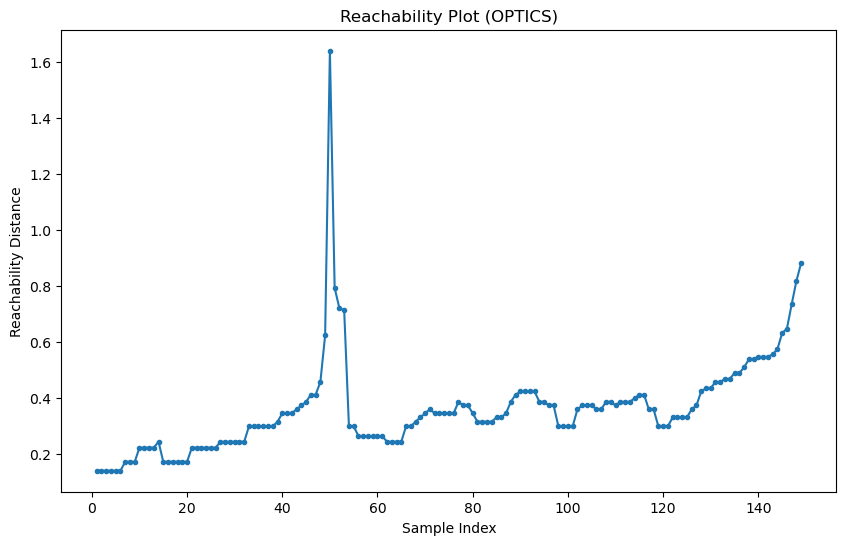

In [8]:
# Plot the reachability plot
reachability = optics.reachability_[optics.ordering_]
labels = optics.labels_[optics.ordering_]

plt.figure(figsize=(10, 6))
plt.plot(range(len(reachability)), reachability, marker='o', linestyle='-', markersize=3)
plt.title('Reachability Plot (OPTICS)')
plt.xlabel('Sample Index')
plt.ylabel('Reachability Distance')
plt.show()


<b>Tuning OPTICS Parameters:</b>

You can experiment with different values for min_samples, xi, and min_cluster_size to optimize clustering results.

In [9]:
# Test different configurations for OPTICS
xi_values = [0.03, 0.05, 0.1]
min_cluster_sizes = [0.05, 0.1, 0.2]

results = []
for xi in xi_values:
    for min_cluster_size in min_cluster_sizes:
        optics = OPTICS(min_samples=5, xi=xi, min_cluster_size=min_cluster_size)
        labels = optics.fit_predict(X)
        n_clusters = len(set(labels) - {-1})
        n_noise = list(labels).count(-1)
        silhouette = silhouette_score(X, labels) if n_clusters > 1 else None
        results.append((xi, min_cluster_size, n_clusters, n_noise, silhouette))

# Display results
print(f"{'Xi':<10} {'Min_Cluster_Size':<20} {'Clusters':<10} {'Noise Points':<15} {'Silhouette Score':<20}")
for xi, min_cluster_size, n_clusters, n_noise, silhouette in results:
    print(f"{xi:<10} {min_cluster_size:<20} {n_clusters:<10} {n_noise:<15} {silhouette if silhouette else 'N/A':<20}")


Xi         Min_Cluster_Size     Clusters   Noise Points    Silhouette Score    
0.03       0.05                 6          74              -0.10466002795815983
0.03       0.1                  3          67              0.2629500246730311  
0.03       0.2                  2          64              0.3939961579958301  
0.05       0.05                 5          87              -0.1536388172826982 
0.05       0.1                  2          85              0.3609764782731796  
0.05       0.2                  2          64              0.3939961579958301  
0.1        0.05                 3          120             -0.21705619809328644
0.1        0.1                  2          17              0.4842923862116451  
0.1        0.2                  2          17              0.4842923862116451  


<b><font color=green size="4">Key Insights:</font></b>

<b>Advantages of OPTICS:</b><ol>
                            <li>Identifies clusters of varying density.</li>
        <li>Produces meaningful results even for datasets with complex structures.</li></ol>
   <b> Reachability Plot:</b><ol>
        <li>Useful for visualizing the density structure of the data.</li></ol>
    <b>Tuning Parameters:</b><ol>
        <li>Helps to discover more refined cluster structures.</li></ol>